# Lending Club Data Set Analysis


The lending club data set contains complete loan data for all loans issued from 2007-2011, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The goal of this project is to use machine learning to predict what types of loans are more likely to be default, in order to increase the efficiency and effectiveness of the loan approval process. 

## 1. Overview of the dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import time
from scipy import stats

### Data wrangling steps to clean the lending club data dataset:

#### Cleaning steps: 
* remove columns that contain more than 75% values are missing:

df.drop(top_mis[top_mis["Percentage %"]>75]["index"], axis = 1, inplace=True)

* Remove columns that are repeating from other columns:

df.drop(["loan_amnt","funded_amnt_inv", "total_acc", 
         "collection_recovery_fee", "out_prncp_inv","total_rec_prncp", "total_pymnt_inv",”
         "annual_inc",  ], 
        axis = 1, inplace = True)

#### Missing values 
* For columns that still contain large number of missing values (>=0.2%), look at the data, and fill in missing values to 0, mean, or mode. Below listed are the top 3, other top ones can just be filled with 0. 

df["mths_since_last_delinq"] = df["mths_since_last_delinq"].fillna(0)

df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(0)

df["open_acc"]= df["open_acc"].fillna(df["open_acc"].mean())

* For the rest of the dataset, since the number of missing values is small (<0.2%), fill in with 0

df = df.fillna(0)


#### No outliers detected 


	


In [3]:
df=pd.read_csv('loan_stats.csv')

/Users/jtian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:

df.tail()

,Unnamed: 0,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_new,year
42530,42531,0,0.0,3500.0,36 months,10.28%,113.39,C,C1,< 1 year,...,Cash,N,0,0,0,0.0,0.0,0.0,Fully Paid,2007
42531,42532,0,0.0,1000.0,36 months,9.64%,32.11,B,B4,< 1 year,...,Cash,N,0,0,0,0.0,0.0,0.0,Fully Paid,2007
42532,42533,0,0.0,2525.0,36 months,9.33%,80.69,B,B3,< 1 year,...,Cash,N,0,0,0,0.0,0.0,0.0,Fully Paid,2007
42533,42534,0,0.0,6500.0,36 months,8.38%,204.84,A,A5,< 1 year,...,Cash,N,0,0,0,0.0,0.0,0.0,Fully Paid,2007
42534,42535,0,0.0,5000.0,36 months,7.75%,156.11,A,A3,10+ years,...,Cash,N,0,0,0,0.0,0.0,0.0,Fully Paid,2007


## 2. Data storytelling
* The following pie chart shows the percentage of issued loans that are charged off, which is 15.12%.

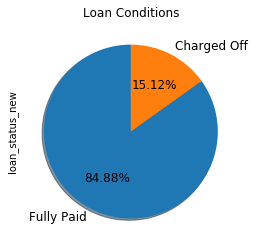

In [23]:
#1. Can you count something interesting?

# 15.12% of loans are charged off


df['loan_status_new'] = df['loan_status']
df.loc[df['loan_status']=='Does not meet the credit policy. Status:Fully Paid',
  'loan_status_new']='Fully Paid'
df.loc[df['loan_status']=='Does not meet the credit policy. Status:Charged Off',
  'loan_status_new']='Charged Off'



df["loan_status_new"].value_counts().plot.pie( autopct='%1.2f%%', shadow=True,  
                                             fontsize=12, startangle=90, title='Loan Conditions')



#datetime_series = pd.to_datetime(df['issue_d'])
df['year']=df['issue_d'].apply(lambda x: int(x.split('-')[1]))



* Over the years from 2007- 2011, loan amount are generally increasing across different credit grades. Lower grades tend to take out more loans. Better grades have lower interest rates. For grades A and B, interest rates are increasing from 2007-2009, and then decrease or staying the same for 2009-2011. The lower grades show continued increase in interest rates.

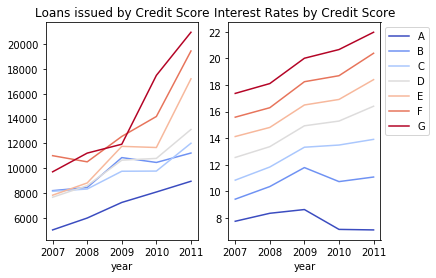

In [24]:
#2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

# People with better credit grades asking for less loans. It makes sense since most of the loans were taken out for credit
# consolidation, and people with better credit grades tend to have less credit debts. 

# interest rates are higher for people with lower credit grades. Overtime, interest rates for people
# with better credit grades decrease, and vice versa.

f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_grade = df.groupby(['year', 'grade']).funded_amnt.mean()
by_grade.unstack().plot(legend=False, ax=ax1, colormap=cmap)
ax1.set_title('Loans issued by Credit Score')
    
     
df['interest']=df.int_rate.apply(lambda x: float(x.strip('%')))   

by_int = df.groupby(['year', 'grade']).interest.mean()
by_int.unstack().plot(ax=ax2, colormap=cmap)
ax2.set_title('Interest Rates by Credit Score')

ax2.legend(bbox_to_anchor=(1, 1))

* The following figures show the purpose of taking out the loans. The loans are most commonly used for debt consolidation. Other top uses include credit card, home inprovement. The second graph shows what proportion are fully paid or charged off. 

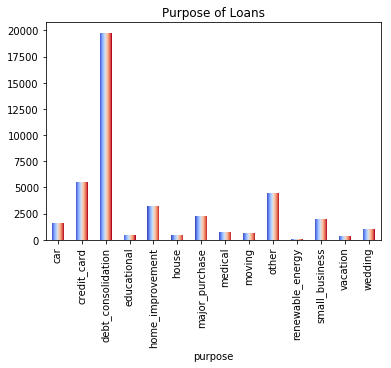

In [25]:
#3. Can you make a bar plot or a histogram?


# most of the loans were used for debt consolidation

by_purpose= df.groupby(['purpose']).count()
by_purpose.plot.bar(legend=False, colormap=cmap, title='Purpose of Loans')





/Users/jtian/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

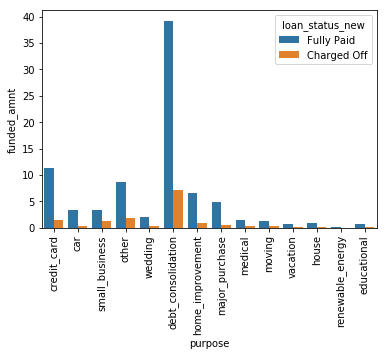

In [26]:
sns.barplot(x="purpose", y="funded_amnt", hue="loan_status_new", data=df,  estimator=lambda x: len(x) / len(df) * 100)

plt.xticks(rotation=90)

* The following plot compares the amount that are fully paid or charged off over the years. Both show increasing trend.

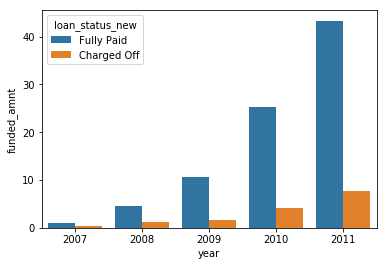

In [27]:
#4. Can you compare two related quantities?

# comparing good loans with bad loans by year

sns.barplot(x="year", y="funded_amnt", hue="loan_status_new", data=df,  estimator=lambda x: len(x) / len(df) * 100)


* The following scatter plot shows total payment amount vs loan amount. It suggests that majority of loans have total payment amount greater than the loan amount, with the addition of interest payment. 

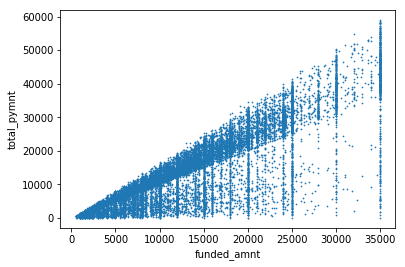

In [28]:
#5.Can you make a scatterplot?

# total payment amount vs loan amount: total payment is more than loan amount 

df.plot.scatter(x='funded_amnt',y='total_pymnt',s=0.5)

* The following time-series plot shows the loan amount over the years 2007-2011.

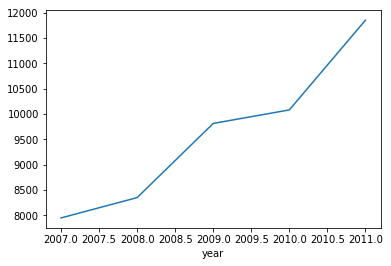

In [29]:
#6.Can you make a time-series plot?
# loan amount over time from 2007-2011



amnt_with_time=df.groupby(df['year']).funded_amnt.mean()

amnt_with_time.plot()



## 3. Statistical analysis

* Compare the loan amount between different credit scores.

The t-value of pairwise comparison between different grades

In [30]:
amount=df['funded_amnt']
grade = df['grade']
amount_by_grade_t=[0]*6 
scores=['A','B','C','D','E','F','G']
for i in range(5):
        amount_by_grade_t[i] = str(round(stats.ttest_ind(amount[grade==scores[i]], amount[grade==scores[i+1]])[0]))
        #amount_by_grade.append(stats.ttest_ind(amount[grade==scores[i]], amount[grade==scores[j]]))

print(amount_by_grade_t)

    
t,p=stats.ttest_ind(amount[grade=='A'], amount[grade=='B'])






['-29.0', '1.0', '-8.0', '-15.0', '-8.0', 0]


P-value between pairwise grades

In [31]:
amount_by_grade_p=[0]*6 
for i in range(5):
    amount_by_grade_p[i] = str(round(stats.ttest_ind(amount[grade==scores[i]], amount[grade==scores[i+1]])[1]))
        #amount_by_grade.append(stats.ttest_ind(amount[grade==scores[i]], amount[grade==scores[j]]))

print(amount_by_grade_p)

['0.0', '0.0', '0.0', '0.0', '0.0', 0]


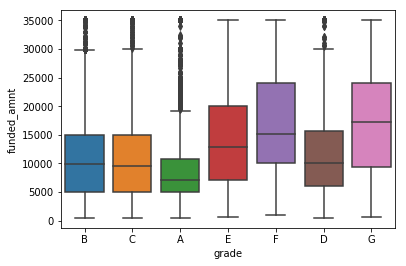

In [32]:
ax = sns.boxplot(x=grade, y=amount, data=df)

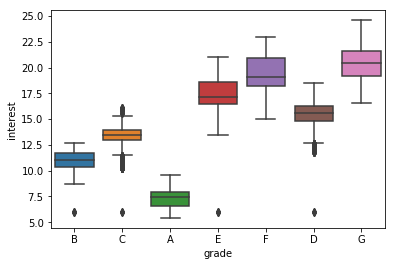

In [36]:
interest=df['interest']
ax = sns.boxplot(x=grade, y=interest, data=df)

* Compare the interest rate between different credit scores

In [37]:

stats.ttest_ind(interest[grade=='A'], interest[grade=='B'])


Ttest_indResult(statistic=-284.4678207550045, pvalue=0.0)

* Using chi-square test to compare the amount of loans that are fully paid or charged off across different credit scores. There is significant difference in the amount of charged of vs fully paid loans given different credit scores. Better grades have less charged off loans compared to lower grades. 

In [38]:
status=df['loan_status_new']
freq_table=pd.crosstab(grade,status)
print(freq_table)
chi2, p, dof, expected=stats.chi2_contingency(freq_table)
print(p,expected)

loan_status_new  Charged Off  Fully Paid
grade                                   
A                        610        9573
B                       1518       10871
C                       1504        7236
D                       1327        4689
E                        883        2511
F                        416         885
G                        173         339
0.0 [[ 1539.59969437  8643.40030563]
 [ 1873.13175032 10515.86824968]
 [ 1321.42800047  7418.57199953]
 [  909.57790055  5106.42209945]
 [  513.14950041  2880.85049959]
 [  196.70226872  1104.29773128]
 [   77.41088515   434.58911485]]


* Finding the correlation between interest rate and loan amount. There is slight positive correlation between the two, suggesting higher loan amount tends to have higher interest rates. 

In [39]:
stats.spearmanr(interest,amount)

SpearmanrResult(correlation=0.24290845587879667, pvalue=0.0)

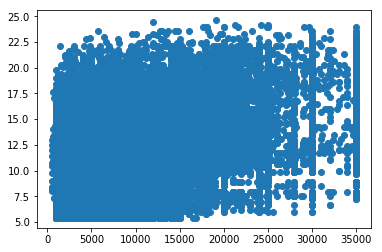

In [40]:
plt.scatter(amount,interest)

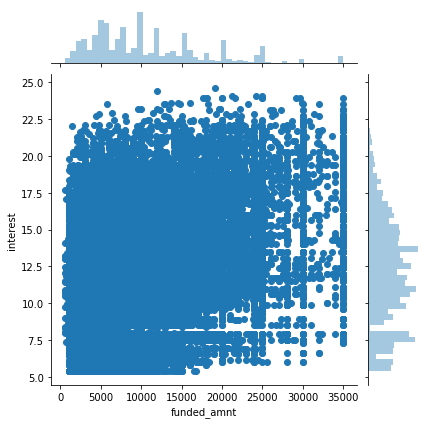

In [41]:
sns.jointplot(x=amount, y=interest, data=df)

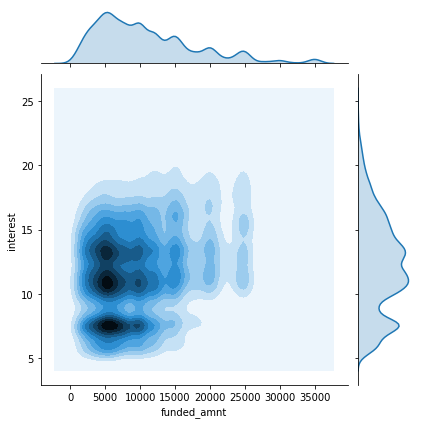

In [42]:

sns.jointplot(x=amount, y=interest, data=df, kind="kde")

## 4. Supervised Learning

In [256]:
from sklearn.model_selection import train_test_split, KFold,cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox

In [332]:
df1 = df.filter(['funded_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status_new'])
df1=df1.dropna(axis=0)
df1.drop(['installment','sub_grade','verification_status','term'], axis=1, inplace = True)
#df1.drop(['purpose'], axis=1, inplace = True)
#df1.drop(['home_ownership'], axis=1, inplace = True)
df1.head(10)

,funded_amnt,int_rate,grade,emp_length,home_ownership,purpose,dti,delinq_2yrs,loan_status_new
0,5000.0,10.65%,B,10+ years,RENT,credit_card,27.65,0.0,Fully Paid
1,2500.0,15.27%,C,< 1 year,RENT,car,1.00,0.0,Charged Off
2,2400.0,15.96%,C,10+ years,RENT,small_business,8.72,0.0,Fully Paid
3,10000.0,13.49%,C,10+ years,RENT,other,20.00,0.0,Fully Paid
4,3000.0,12.69%,B,1 year,RENT,other,17.94,0.0,Fully Paid
5,5000.0,7.90%,A,3 years,RENT,wedding,11.20,0.0,Fully Paid
6,7000.0,15.96%,C,8 years,RENT,debt_consolidation,23.51,0.0,Fully Paid
7,3000.0,18.64%,E,9 years,RENT,car,5.35,0.0,Fully Paid
8,5600.0,21.28%,F,4 years,OWN,small_business,5.55,0.0,Charged Off
9,5375.0,12.69%,B,< 1 year,RENT,other,18.08,0.0,Charged Off


In [333]:
#df1['emp_length']=df1['emp_length'].apply(lambda x: str(x.split(' ')[0]))
df1['int_rate_new']=df1['int_rate'].apply(lambda x: float(x.split('%')[0]))
df1.drop(['int_rate'],axis=1, inplace = True)
df1.head(10)

,funded_amnt,grade,emp_length,home_ownership,purpose,dti,delinq_2yrs,loan_status_new,int_rate_new
0,5000.0,B,10+ years,RENT,credit_card,27.65,0.0,Fully Paid,10.65
1,2500.0,C,< 1 year,RENT,car,1.00,0.0,Charged Off,15.27
2,2400.0,C,10+ years,RENT,small_business,8.72,0.0,Fully Paid,15.96
3,10000.0,C,10+ years,RENT,other,20.00,0.0,Fully Paid,13.49
4,3000.0,B,1 year,RENT,other,17.94,0.0,Fully Paid,12.69
5,5000.0,A,3 years,RENT,wedding,11.20,0.0,Fully Paid,7.90
6,7000.0,C,8 years,RENT,debt_consolidation,23.51,0.0,Fully Paid,15.96
7,3000.0,E,9 years,RENT,car,5.35,0.0,Fully Paid,18.64
8,5600.0,F,4 years,OWN,small_business,5.55,0.0,Charged Off,21.28
9,5375.0,B,< 1 year,RENT,other,18.08,0.0,Charged Off,12.69


In [334]:
df1['loan_status_new']=df1['loan_status_new'].astype('category').cat.codes
#cleanup_nums = {"loan_status_new":{"Fully Paid": 1, "Charged Off": 0}}
#df1.replace(cleanup_nums,inplace=True)
#df1.replace({'Fully Paid': 1, 'Charged Off': 0})

df1.head()
df1['loan_status_new'].value_counts()

1    36104
0     6431
Name: loan_status_new, dtype: int64

In [335]:
df1.dtypes

funded_amnt        float64
grade               object
emp_length          object
home_ownership      object
purpose             object
dti                float64
delinq_2yrs        float64
loan_status_new       int8
int_rate_new       float64
dtype: object

In [336]:
df2 = pd.get_dummies(df1, drop_first=True)
print(df2.dtypes)
df2['loan_status_new'].value_counts()
print(df2.head())

funded_amnt                   float64
dti                           float64
delinq_2yrs                   float64
loan_status_new                  int8
int_rate_new                  float64
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
emp_length_1 year               uint8
emp_length_10+ years            uint8
emp_length_2 years              uint8
emp_length_3 years              uint8
emp_length_4 years              uint8
emp_length_5 years              uint8
emp_length_6 years              uint8
emp_length_7 years              uint8
emp_length_8 years              uint8
emp_length_9 years              uint8
emp_length_< 1 year             uint8
home_ownership_NONE             uint8
home_ownership_OTHER            uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
purpose_cred

In [246]:


X= df2.drop('loan_status_new', axis=1)
y = df2['loan_status_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y_test.value_counts())
print(y_train.value_counts())

1    11963
0     2074
Name: loan_status_new, dtype: int64
1    24141
0     4357
Name: loan_status_new, dtype: int64


In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(solver='lbfgs')

#kf=KFold(10, random_state=1)
# Fit the model on the trainng data.

clf.fit(X_train, y_train)

#clf_prediction_train=cross_val_predict(clf,X_train, y_train, cv=kf, method='predict_proba')
#train_roc = roc_auc_score(y_train, clf_prediction_train[:,1])

pred = clf.predict_proba(X_test)
test_roc = roc_auc_score(y_test, pred[:,1])

#print('train roc is '+ str(train_roc))
print('Roc auc score is '+ str(test_roc))
# Print the accuracy from the testing data.
#print(roc_auc_score(y_test, clf.predict(X_test)))

Roc auc score is 0.6033371458493324


Confusion matrix, without normalization
[[    0  2074]
 [    0 11963]]


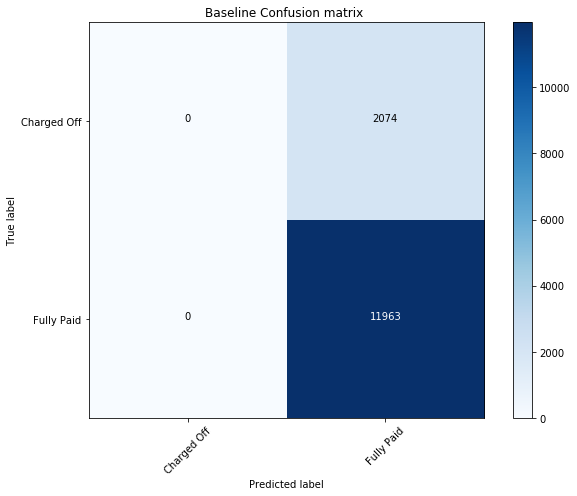

In [284]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    '''Function to display confusion matrix from sickit learn
    documentation'''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(False)


# Compute confusion matrix
cnf_matrix= confusion_matrix(y_test, clf.predict(X_test))
class_names = ['Charged Off', "Fully Paid"]
np.set_printoptions(precision=2)

# Plot hold out set confusion matrix
plt.figure(figsize = (9,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Baseline Confusion matrix ')

In [267]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_train, y_train, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.84568421 0.84577324 0.84514159] 0.8455330145555487
MNB [0.84094737 0.84219392 0.83440362] 0.8391816350012836
RF [0.83810526 0.83977261 0.84029898] 0.8393922832135607


/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR [0.84705263 0.84703653 0.8471418 ] 0.8470769887134934


/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [281]:
# Logistic Regression

clfl2=LogisticRegression(solver='lbfgs')
parameters = {"C":  [0.0000001,0.00001, 0.0001, 0.001, 0.1, 1, 10, 100],'class_weight':[None,'balanced']}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="roc_auc")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_


/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 {'C': 100, 'class_weight': None},
 0.6369589885321794)

In [282]:
model=fitmodel.best_estimator_.fit(X_train, y_train)
predict = model.predict_proba(X_test)
roc = roc_auc_score(y_test, predict[:,1])
print(roc)

0.6033848258101502


In [295]:
# Random Forest Classifier

params = {'n_estimators': [600,800,1000]}
grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=params,
                                   scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_RF.fit(X_train, y_train)
print(grid_search_RF.best_params_)
print(grid_search_RF.best_score_)

model_RF=grid_search_RF.best_estimator_.fit(X_train, y_train)
predict_RF = model_RF.predict_proba(X_test)
roc_RF = roc_auc_score(y_test, predict_RF[:,1])
print(roc_RF)

{'n_estimators': 800}
0.6305528736158974
0.6291543936781612


Confusion matrix, without normalization
[[   56  2018]
 [  157 11806]]


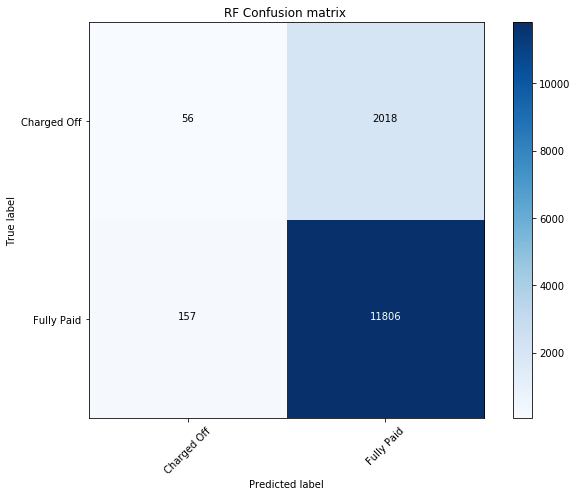

In [296]:
nf_matrix= confusion_matrix(y_test, model_RF.predict(X_test))
class_names = ['Charged Off', "Fully Paid"]
np.set_printoptions(precision=2)

# Plot hold out set confusion matrix
plt.figure(figsize = (9,7))
plot_confusion_matrix(nf_matrix, classes=class_names, title='RF Confusion matrix ')

In [294]:
# Linear discriminant analysis

p = {'n_components': [1,2,3] }
grid_search_LDA = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=p,
                                   scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_LDA.fit(X_train, y_train)
print(grid_search_LDA.best_params_)
print(grid_search_LDA.best_score_)
model_LDA=grid_search_LDA.best_estimator_.fit(X_train, y_train)
predict_LDA = model_LDA.predict_proba(X_test)
roc_LDA = roc_auc_score(y_test, predict_LDA[:,1])
print(roc_LDA)

{'n_components': 1}
0.6748973164731733
0.6751030640843662


Confusion matrix, without normalization
[[   28  2046]
 [   61 11902]]


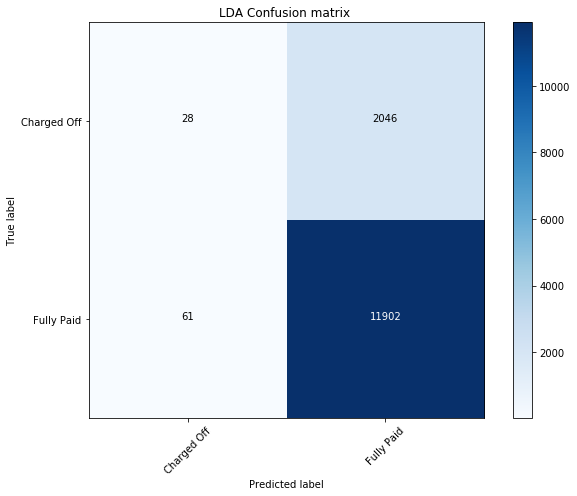

In [290]:
cf_matrix= confusion_matrix(y_test, model_LDA.predict(X_test))
class_names = ['Charged Off', "Fully Paid"]
np.set_printoptions(precision=2)

# Plot hold out set confusion matrix
plt.figure(figsize = (9,7))
plot_confusion_matrix(cf_matrix, classes=class_names, title='LDA Confusion matrix ')

In [324]:
model_LDA.coef_



array([[ 8.44e-06, -1.06e-02,  6.25e-02, -8.28e-02, -2.22e-01, -4.20e-01,
        -6.22e-01, -8.25e-01, -1.05e+00, -1.36e+00,  7.98e-01,  6.72e-01,
         9.13e-01,  7.32e-01,  8.70e-01,  7.49e-01,  7.69e-01,  7.03e-01,
         7.46e-01,  9.02e-01,  8.08e-01,  4.73e-01, -2.51e-01, -3.36e-03,
        -6.23e-02,  1.07e-01, -1.66e-01, -8.27e-01, -1.49e-01, -4.73e-01,
         4.62e-02, -4.32e-01, -2.50e-01, -2.96e-01, -5.70e-01, -1.11e+00,
        -2.99e-01,  4.03e-02]])

In [317]:
X.columns
len(X.columns)


38

In [326]:
coef={}
for i in range(38):
    coef[X.columns[i]]=model_LDA.coef_[0,i]
coef    

{'funded_amnt': 8.4394496673895e-06,
 'dti': -0.010561491998644486,
 'delinq_2yrs': 0.06253595005605912,
 'int_rate_new': -0.08279106176673089,
 'grade_B': -0.22243255438914414,
 'grade_C': -0.420018351364107,
 'grade_D': -0.6222771522317208,
 'grade_E': -0.8253114747327077,
 'grade_F': -1.0544514023846743,
 'grade_G': -1.3602033567192855,
 'emp_length_1 year': 0.7976107080280654,
 'emp_length_10+ years': 0.6723995453494784,
 'emp_length_2 years': 0.9134305496965776,
 'emp_length_3 years': 0.7324268006344278,
 'emp_length_4 years': 0.8703385869624242,
 'emp_length_5 years': 0.7487595772001371,
 'emp_length_6 years': 0.7692903272904142,
 'emp_length_7 years': 0.7030437018407067,
 'emp_length_8 years': 0.7459496919864728,
 'emp_length_9 years': 0.9021139772686582,
 'emp_length_< 1 year': 0.8081057279843351,
 'home_ownership_NONE': 0.4727771600998133,
 'home_ownership_OTHER': -0.25105469143040016,
 'home_ownership_OWN': -0.003357897214388583,
 'home_ownership_RENT': -0.0623284996587742,
 

It appears that LDA is providing the best result for the test set. LDA tries to identify attributes that account for the most variance between classes. 

In [293]:
# Multinomial NB 

pa = {'alpha':[0,0.1,1]}
grid_search_NB = GridSearchCV(MultinomialNB(), param_grid=pa,
                                   scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_NB.fit(X_train, y_train)
print(grid_search_NB.best_params_)
print(grid_search_NB.best_score_)

model_NB=grid_search_NB.best_estimator_.fit(X_train, y_train)
predict_NB = model_NB.predict_proba(X_test)
roc_NB = roc_auc_score(y_test, predict_NB[:,1])
print(roc_NB)

{'alpha': 0}
0.613376692131501
0.6129973961018186


/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/jtian/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Confusion matrix, without normalization
[[   78  1996]
 [  157 11806]]


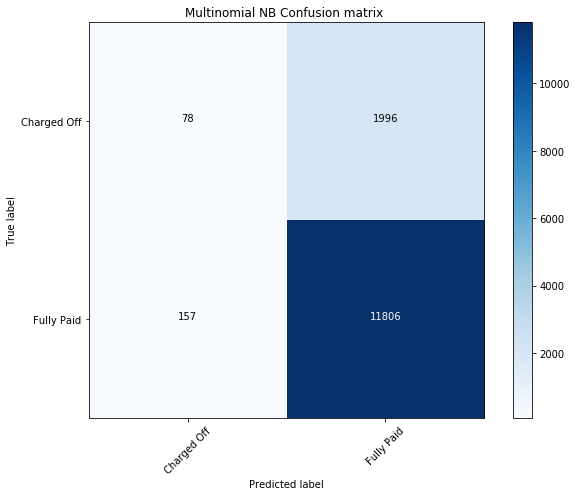

In [292]:
cn_matrix= confusion_matrix(y_test, model_NB.predict(X_test))
class_names = ['Charged Off', "Fully Paid"]
np.set_printoptions(precision=2)

# Plot hold out set confusion matrix
plt.figure(figsize = (9,7))
plot_confusion_matrix(cn_matrix, classes=class_names, title='Multinomial NB Confusion matrix ')